Coefficients: 
 [ 306.72757499]
Residual sum of squares: 5472.26
Variance score: -0.13
Coefficients: 
 [ 59.78480979]
Residual sum of squares: 5501.91
Variance score: -0.14
Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47
Coefficients: 
 [ 709.19471785]
Residual sum of squares: 4058.41
Variance score: 0.16
Coefficients: 
 [ 352.82770178]
Residual sum of squares: 5608.70
Variance score: -0.16
Coefficients: 
 [ 288.4846506]
Residual sum of squares: 5564.14
Variance score: -0.15
Coefficients: 
 [-647.34661414]
Residual sum of squares: 4538.34
Variance score: 0.06
Coefficients: 
 [ 701.12961061]
Residual sum of squares: 4850.82
Variance score: -0.00
Coefficients: 
 [ 900.39171612]
Residual sum of squares: 2923.34
Variance score: 0.39
Coefficients: 
 [ 630.53662695]
Residual sum of squares: 5265.50
Variance score: -0.09


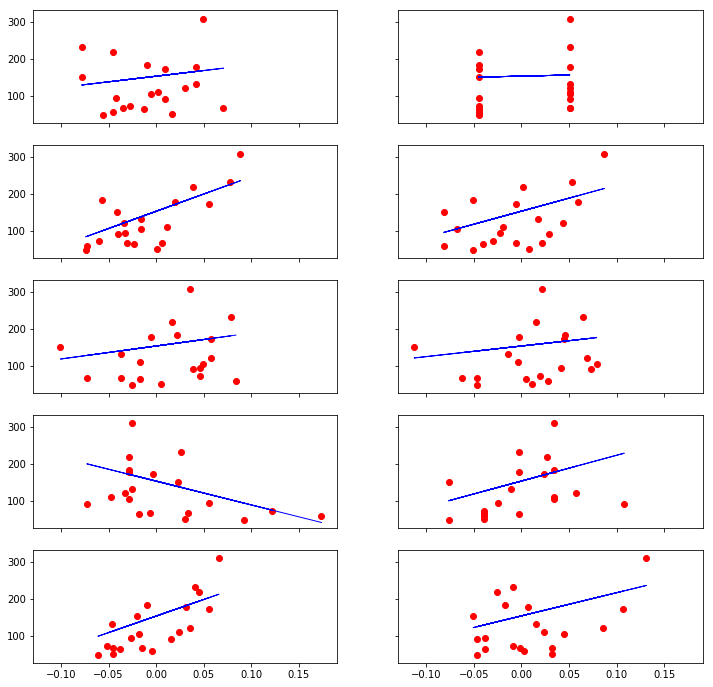

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
 
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
 
f, axarr = plt.subplots(5,2, sharex=True, sharey=True,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        # Use only one feature
        diabetes_X = diabetes.data[:, np.newaxis, i*2+j]
        
        # Split the data into training/testing sets
        diabetes_X_train = diabetes_X[:-20]
        diabetes_X_test = diabetes_X[-20:]
        
        # Split the targets into training/testing sets
        diabetes_y_train = diabetes.target[:-20]
        diabetes_y_test = diabetes.target[-20:]
        
        # Create linear regression object
        regr = linear_model.LinearRegression()
        
        # Train the model using the training sets
        regr.fit(diabetes_X_train, diabetes_y_train)
        
        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean square error
        print("Residual sum of squares: %.2f"
              % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))
        
        # Plot outputs
        axarr[i,j].scatter(diabetes_X_test, diabetes_y_test,  color='red')
        axarr[i,j].plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=1)
        
plt.show()

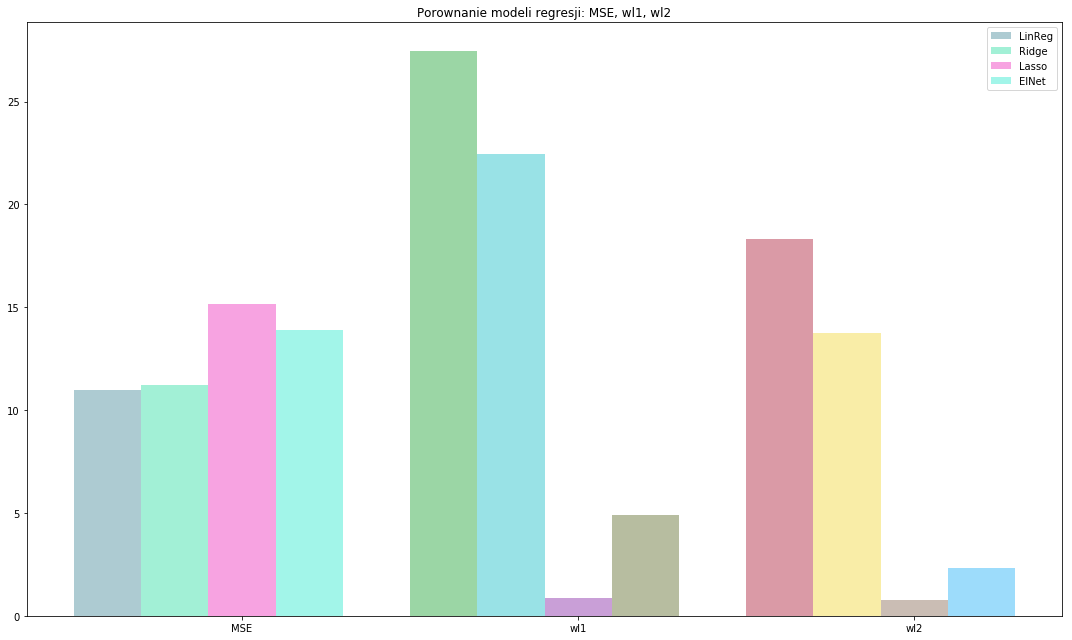

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Reggression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
# print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]
 
regressors = {}
regressors['LinReg'] =linm.LinearRegression()
regressors['Ridge'] = linm.Ridge(alpha = .5)
regressors['Lasso'] = linm.Lasso(alpha = 5.1)
regressors['ElNet'] =linm.ElasticNet(alpha = .5, l1_ratio=0.5)
 
fit_results={}
 
 
for key in regressors:
    # Train the model using the training sets
    regr = regressors[key]
    regr.fit(boston_X_train, boston_y_train)
    # mean square error
    mse = np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2)
    w = regr.coef_
    # l1 norm
    wl1 = np.sum(np.abs(w))
    # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
 #   print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))
    
    
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
 
fig, ax = plt.subplots(figsize=(15,9))
 
t=0
for key in regressors:
     
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(3,4),
                 label=key)
    t+=1
 
#plt.xlabel('Modele regresji')
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
 
plt.tight_layout()
plt.show()